In [0]:
#To acces The data 
!git clone https://bitbucket.org/jadslim/german-traffic-signs


fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
import pickle
import pandas as pd
import cv2

In [0]:
with open("german-traffic-signs/train.p",'rb') as f:
  traindata=pickle.load(f)
with open("german-traffic-signs/valid.p",'rb') as f:
  valdata=pickle.load(f)
with open("german-traffic-signs/test.p",'rb') as f:
  testdata=pickle.load(f)

In [0]:
X_train,y_train= traindata['features'],traindata['labels']
X_test,y_test= testdata['features'],testdata['labels']
X_val,y_val= valdata['features'],valdata['labels']

In [0]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [0]:
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

In [0]:
data=pd.read_csv('german-traffic-signs/signnames.csv')
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


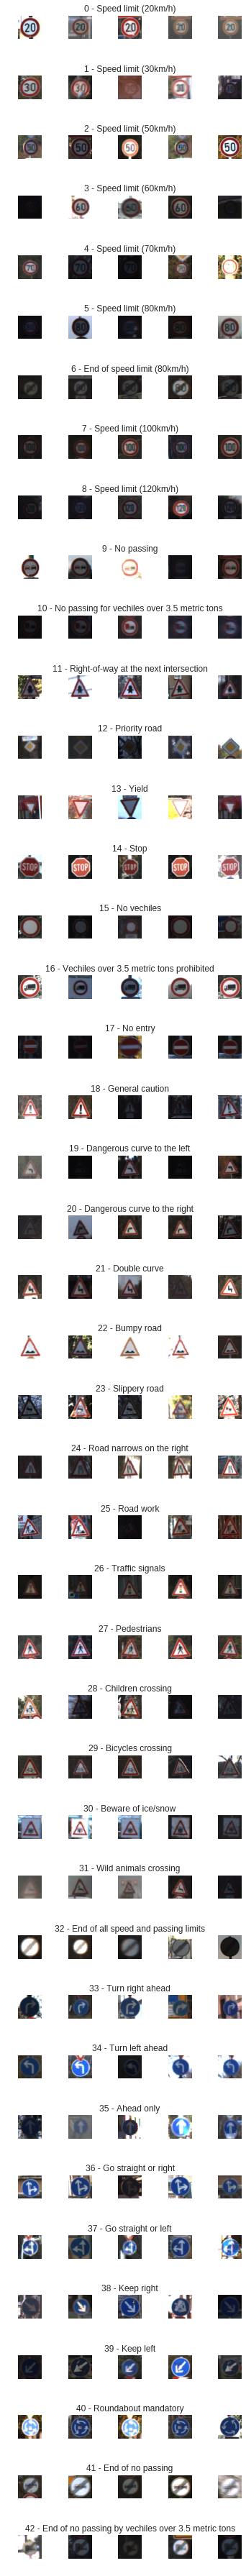

In [0]:
#To visualize the images of each class


#(index,series)  -> iterrows
num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
          axs[j][i].set_title(str(j) + " - " + row["SignName"])
          num_of_samples.append(len(x_selected))


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


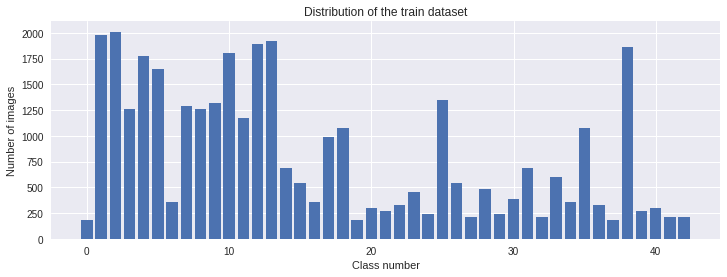

In [0]:
#To visalize  the number of  samples in each  class
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

1


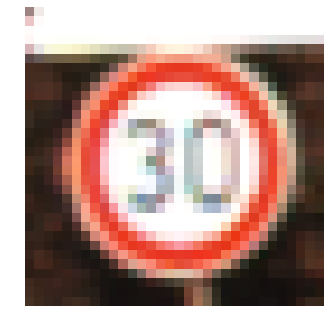

In [0]:
plt.imshow(X_train[3000])
plt.axis('off')
print(y_train[3000])

(-0.5, 31.5, 31.5, -0.5)

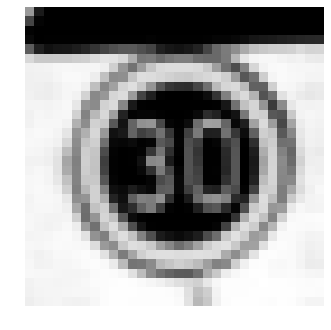

In [0]:
#To convert image to gray 

def grayimage(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img
img=grayimage(X_train[3000])

plt.imshow(img)
plt.axis('off')

(-0.5, 31.5, 31.5, -0.5)

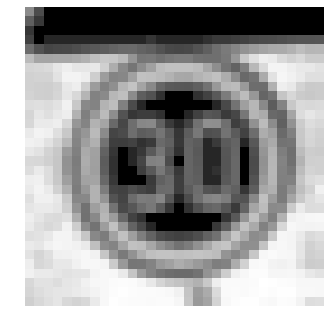

In [0]:
#to apply  histogram equaliztion:
def equaliztion(img):
  img=cv2.equalizeHist(img)
  return img

img=equaliztion(img)
plt.imshow(img)
plt.axis('off')



In [0]:

#TO Preprocessing images

def preprocessing (img):
  img=grayimage(img)
  img=equaliztion(img)
  img=img/255
  return img
X_train=np.array(list(map(preprocessing,X_train)))
X_test=np.array(list(map(preprocessing,X_test)))
X_val=np.array(list(map(preprocessing,X_val)))

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


  

(34799, 32, 32)
(12630, 32, 32)
(4410, 32, 32)


(34799, 32, 32)


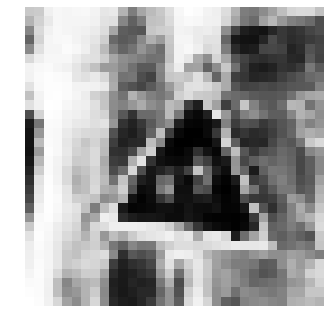

In [0]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [0]:
X_train=X_train.reshape(34799, 32, 32,1)
X_test=X_test.reshape(12630, 32, 32,1)
X_val=X_val.reshape(4410, 32, 32,1)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [0]:
#To apply One Hot encoding 

y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)

In [0]:
#Data Agumention
from keras.preprocessing.image import  ImageDataGenerator

datagen=ImageDataGenerator(width_shift_range=0.1,
                           height_shift_range=0.1,
                           zoom_range=0.2,
                           shear_range=0.1,
                           rotation_range=10)

datagen.fit(X_train)

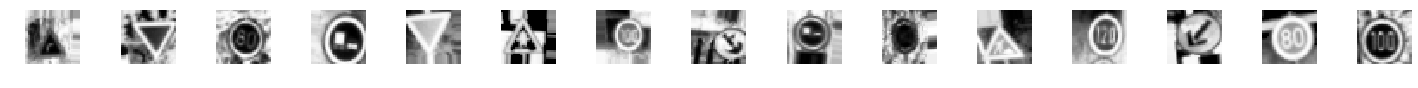

In [0]:
batches=datagen.flow(X_train,y_train,batch_size=20) #each time called genetrate 20 image
X_batch,y_batch=next(batches)   #each time call function  next is call batch that generate 20 image

fig, axs=plt.subplots(1,15,figsize=(20,10))
fig.tight_layout()
for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')

In [0]:
 #Define  the model
def create_model():
  model=Sequential()
  model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))
  model.add(Conv2D(60,(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  
  
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model
model=create_model()
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 480)               0         
__________

In [0]:
history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=50),steps_per_epoch=2000,validation_data=(X_val,y_val),epochs=10,shuffle=1)

Epoch 1/10
2000/2000 [==============================] - 51s 26ms/step - loss: 0.9089 - acc: 0.7357 - val_loss: 0.0944 - val_acc: 0.9698
Epoch 2/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.2174 - acc: 0.9332 - val_loss: 0.0593 - val_acc: 0.9821
Epoch 3/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.1453 - acc: 0.9550 - val_loss: 0.0564 - val_acc: 0.9887
Epoch 4/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.1136 - acc: 0.9652 - val_loss: 0.0469 - val_acc: 0.9887
Epoch 5/10
2000/2000 [==============================] - 51s 25ms/step - loss: 0.0971 - acc: 0.9692 - val_loss: 0.0656 - val_acc: 0.9850
Epoch 6/10
2000/2000 [==============================] - 51s 25ms/step - loss: 0.0812 - acc: 0.9749 - val_loss: 0.0735 - val_acc: 0.9766
Epoch 7/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.0742 - acc: 0.9776 - val_loss: 0.0371 - val_acc: 0.9921
Epoch 8/10
2000/2000 [==========================

/bin/bash: line 0: cd: drive: No such file or directory


Text(0.5, 0, 'epochs')

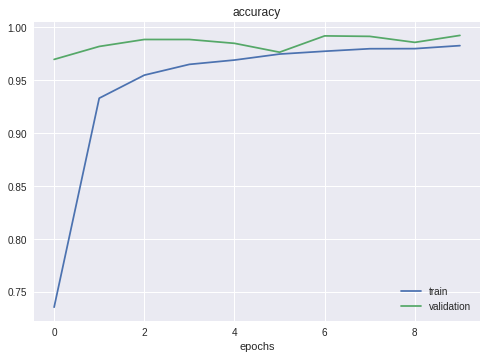

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','validation'])
plt.title('accuracy')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

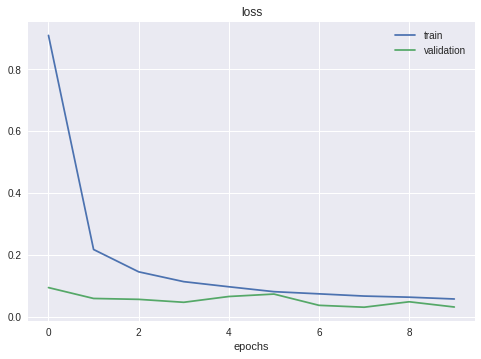

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.title('loss')
plt.xlabel('epochs')

In [0]:
score=model.evaluate(X_test,y_test,verbose=0)
print('test score : ',score[0])
print('test accuarcy : ',score[1])

test score :  0.11508616778953089
test accuarcy :  0.9712589073822976


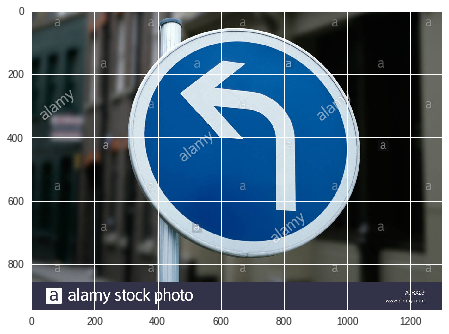

In [0]:
#predict internet number
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)
predicted sign: [34]


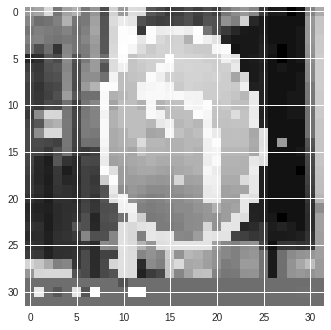

In [0]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)

print("predicted sign: "+ str(model.predict_classes(img)))